## Imports and creds

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

In [3]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)

In [ ]:
%%R
install.packages("sysfonts")
install.packages("extrafont")
install.packages("showtext")
library(sysfonts)
library(extrafont)
library(showtext)

In [13]:
%%R
font_add_google("Didact Gothic", "dg")
font_add_google("IBM Plex Sans KR", "ibm")

In [79]:
%%R
font_add_google("Mulish", "mul")

In [53]:
%%R
font_add_google("Inter", "int")

In [57]:
%%R

showtext_auto()

In [61]:
%%R

theme_light_beige <- theme(plot.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      panel.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      plot.margin = margin(t = "1.5", r = "1.5", b = "1.5", l = "1.5", unit = "in"),
      plot.caption = element_text(size = 12, color = "#343A41", family = "int"),
      panel.grid = element_blank(),
      plot.title = element_text(size = 30, color = "#343A41", family = "int", face = "bold"),
      axis.text = element_text(size = 15, color = "#343A41", family = "int"),
      axis.title = element_text(size = 19, color = "#343A41", family = "int"),
      axis.ticks = element_blank(),
      legend.background = element_blank(),
      legend.position = "bottom",
      legend.title = element_text(color = "#343A41", family = "int"),
      legend.text = element_text(color = "#343A41", family = "int"))

In [15]:
%ls

sample_data/


In [16]:
# Mount drive - needed for GBQ creds
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
root_path = '/content/drive/MyDrive/GitHub'

In [18]:
credentials = service_account.Credentials.from_service_account_file(
    f'{root_path}/grav-waves/grav-waves-358320-34ebfeae2689.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

## Query data

In [19]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [20]:
from google.colab import syntax

How many versions of each event do we have?

In [147]:
%%bigquery --project grav-waves-358320

SELECT commonName, COUNT(*) AS n_versions
FROM mergers.features
GROUP BY commonName
HAVING n_versions > 1
ORDER BY n_versions DESC;

,commonName,n_versions
0,GW190412,4
1,GW190521,4
2,GW190425,3
3,GW190814,3
4,GW150914,3
5,GW151012,3
6,GW170608,3
7,GW170814,3
8,GW170817,3
9,GW190408_181802,2


What differs among versions, and which is the most reliable? My assumption would be that the latest version is the most reliable. Let's take a look at an event with multiple versions to see if there's any info to contradict that guess.

In [140]:
%%bigquery --project grav-waves-358320

SELECT *
FROM mergers.features
WHERE commonName = 'GW190412'
ORDER BY version;

,id,commonName,version,catalog_shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper,merger_datetime
0,GW190412-v1,GW190412,1,O3_Discovery_Papers,1.239082e+09,/o3_eventdata_docs,https://www.gw-openscience.org/eventapi/json/O...,NaN,NaN,NaN,...,NaN,None,None,NaN,None,None,NaN,NaN,NaN,2019-04-12
1,GW190412-v2,GW190412,2,O3_Discovery_Papers,1.239082e+09,/o3_eventdata_docs/,https://www.gw-openscience.org/eventapi/json/O...,30.1,-5.3,4.6,...,NaN,None,None,NaN,None,None,NaN,NaN,NaN,2019-04-12
2,GW190412-v3,GW190412,3,GWTC-2,1.239082e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,30.1,-5.1,4.7,...,0.00001,None,None,1.0,None,None,37.3,-3.8,3.9,2019-04-12
3,GW190412_053044-v4,GW190412,4,GWTC-2.1-confident,1.239082e+09,/GWTC-2.1/,https://www.gw-openscience.org/eventapi/json/G...,27.7,-6.0,6.0,...,0.00001,None,None,1.0,None,None,35.6,-4.5,4.8,2019-04-12


In [21]:
%%bigquery --project grav-waves-358320 gw

WITH max_version AS (SELECT commonName, MAX(version) AS max_version,
                    FROM mergers.features
                    WHERE mass_1_source IS NOT NULL AND mass_2_source IS NOT NULL
                    GROUP BY commonName)

SELECT a.commonName, a.GPS, a.mass_1_source, a.mass_2_source, a.final_mass_source, a.merger_datetime
FROM mergers.features a

INNER JOIN max_version b
ON a.commonName = b.commonName
AND a.version = b.max_version

WHERE a.merger_datetime > '2010-01-01'; --get rid of blind injection row

In [8]:
# Another way to pull in data; I prefer to use a SQL code chunk
# features_q = syntax.sql('''SELECT 
#                           * FROM `grav-waves-358320.mergers.features`;''')
# gw = client.query(features_q).to_dataframe()

In [22]:
gw.head(5)

,commonName,GPS,mass_1_source,mass_2_source,final_mass_source,merger_datetime
0,GW190424_180648,1.240164e+09,40.5,31.8,68.9,2019-04-24 18:06:48
1,GW190426_152155,1.240327e+09,5.7,1.5,NaN,2019-04-26 15:21:55
2,GW190909_114149,1.252065e+09,45.8,28.3,72.0,2019-09-09 11:41:49
3,GW150914,1.126259e+09,35.6,30.6,63.1,2015-09-14 00:00:00
4,GW151012,1.128679e+09,23.2,13.6,35.6,2015-10-12 00:00:00


In [64]:
%%R
loadfonts(device = "win")

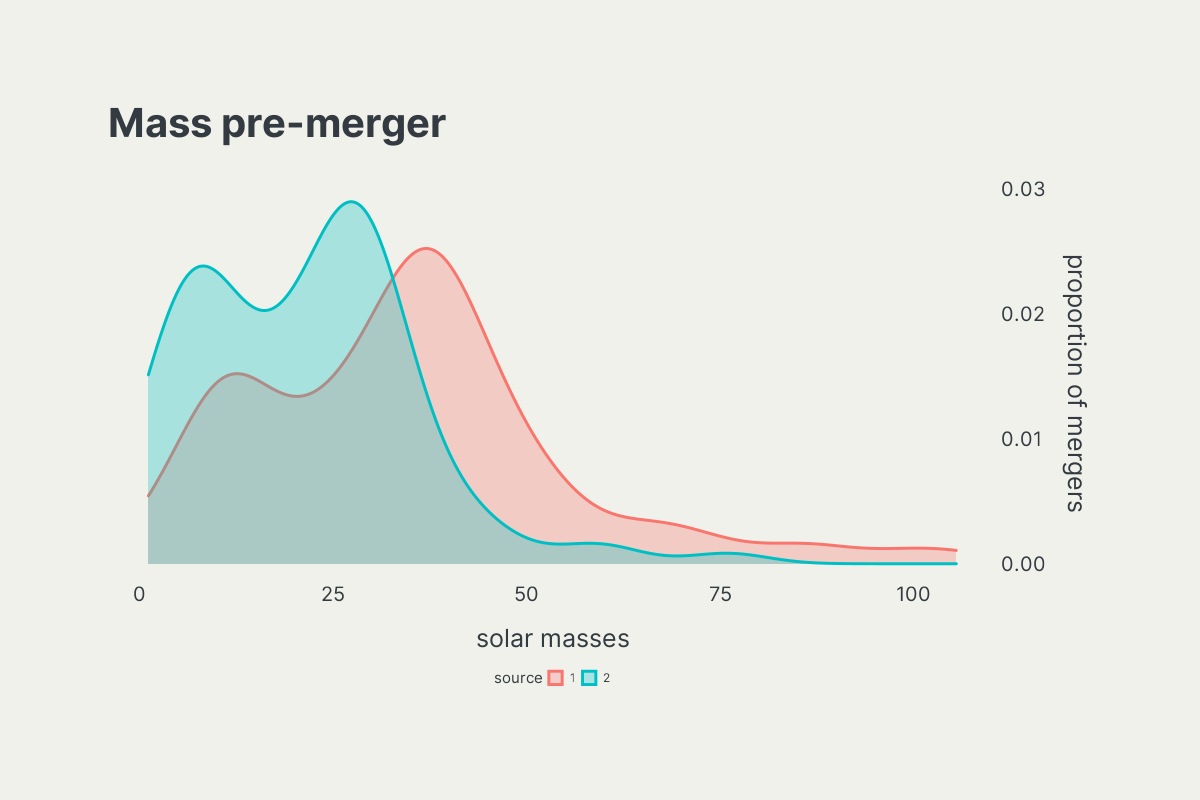

In [164]:
%%R -i gw -h 800 -w 1200

gw %>%
select(commonName, mass_1_source, mass_2_source) %>%
gather(mass_1_source, mass_2_source, key = "source", value = "mass") %>%
mutate(source = ifelse(source == "mass_1_source", "1", "2")) %>% 
 ggplot(aes(mass, fill = source, color = source)) +
# geom_density(fill = "#343A41", color = "#343A41", alpha = 0.3, size = 1.4) +
geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Mass pre-merger\n",
     x = "\nsolar masses",
     y = "proportion of mergers\n") +
scale_y_continuous(position = "right") +
theme_light_beige

In [110]:
%%R
library(lubridate)

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




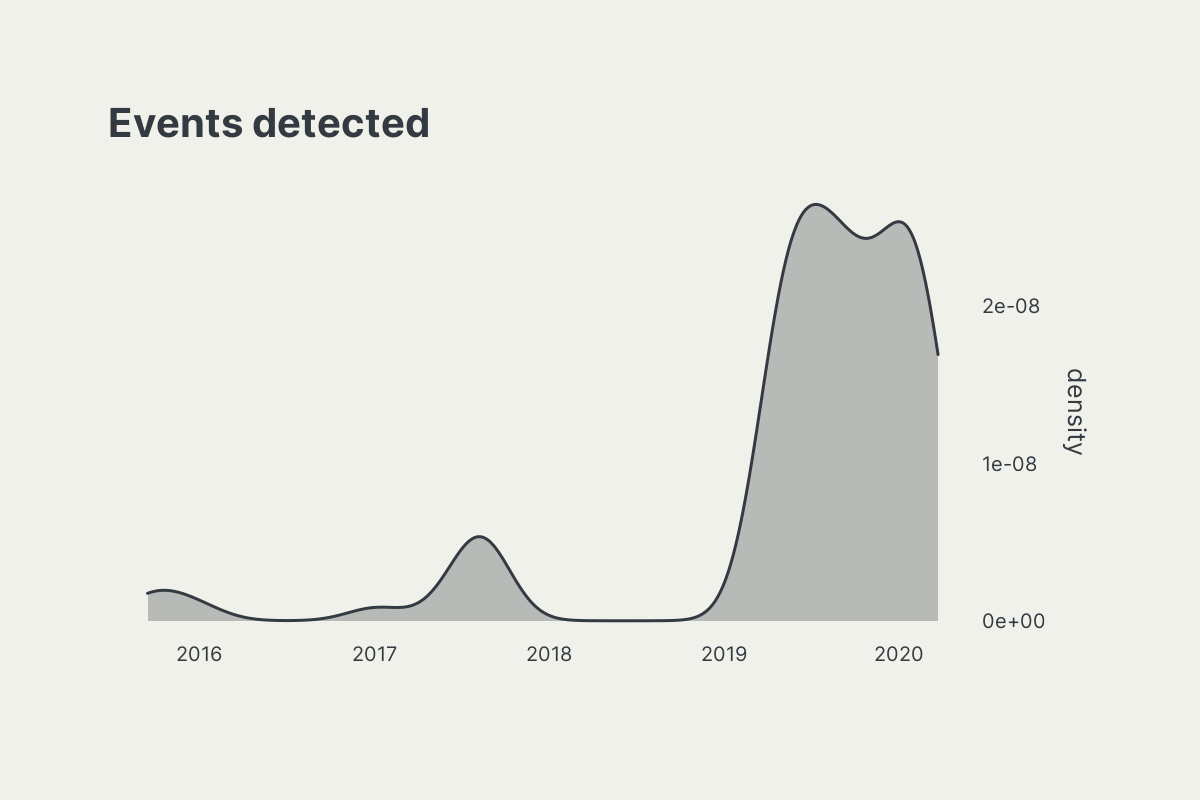

In [165]:
%%R -h 800 -w 1200

showtext_auto()

gw %>%
 ggplot(aes(merger_datetime)) +
geom_density(fill = "#343A41", color = "#343A41", alpha = 0.3, size = 1.4) +
# geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Events detected\n",
     x = "",
     y = "density\n") +
scale_y_continuous(position = "right") +
theme_light_beige


Each separate observation run is quite clear.

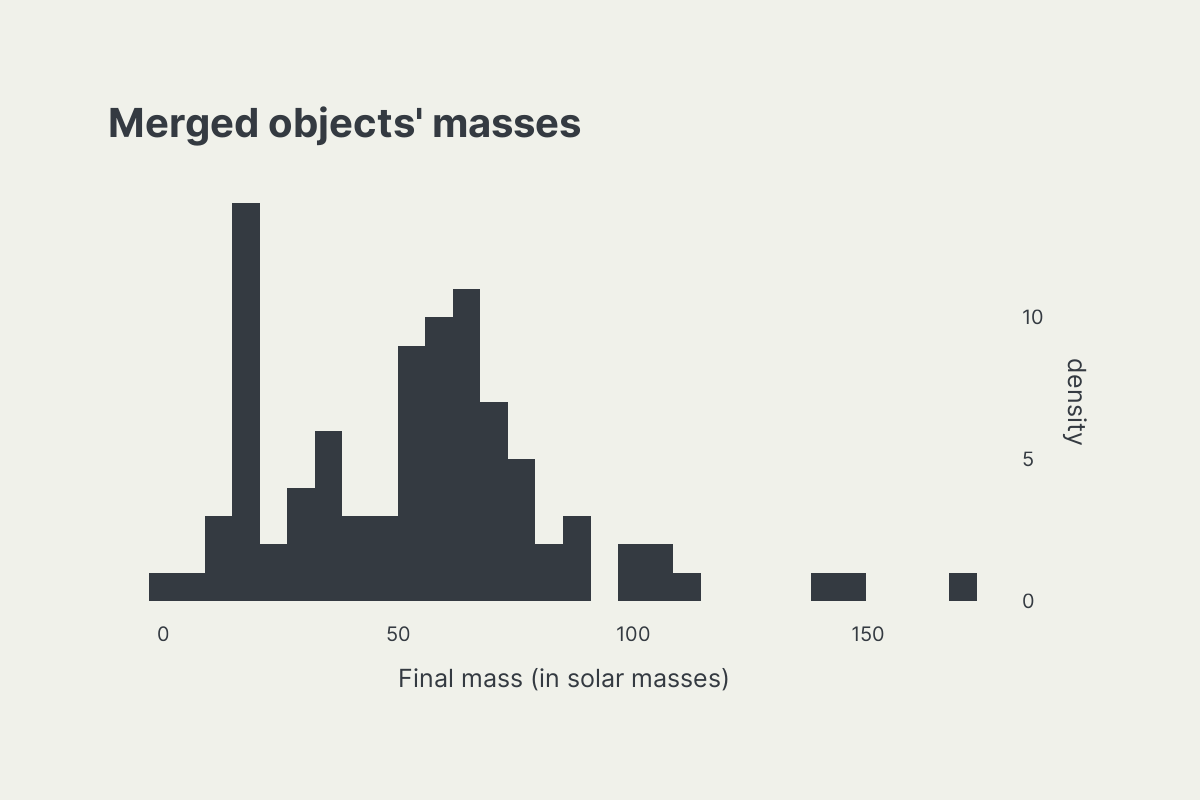

In [170]:
%%R -h 800 -w 1200
gw %>%
 ggplot(aes(final_mass_source)) +
geom_histogram(fill = "#343A41", size = 1.4) +
# geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Merged objects' masses\n",
     x = "\nFinal mass (in solar masses)",
     y = "density\n") +
scale_y_continuous(position = "right") +
theme_light_beige

Why is there a spike in final masses around ~20 solar masses?

In [24]:
import numpy as np

In [27]:
final_mass = np.array(gw['final_mass_source'])
final_mass_num = final_mass[~np.isnan(final_mass)]

In [28]:
final_mass_num

array([ 68.9 ,  72.  ,  63.1 ,  35.6 ,  20.5 ,  48.9 ,  17.8 ,  79.5 ,
        56.3 ,  53.2 ,   2.8 ,  59.4 ,  65.4 , 107.  ,  34.  ,  32.2 ,
        26.7 ,  47.4 ,  60.1 , 147.4 ,  72.4 ,  11.6 ,  19.  ,  17.6 ,
        41.4 ,  82.  ,   7.2 ,  71.  ,  62.5 ,  62.2 ,  64.  ,  32.1 ,
        55.5 ,  34.3 ,  52.1 ,  66.4 ,  88.  ,  54.5 ,  20.8 ,  19.7 ,
        67.4 ,  62.1 ,  65.  ,  13.3 ,  34.9 ,  20.2 , 102.2 ,  59.6 ,
        53.  ,  76.  ,  61.  ,  60.8 ,  72.6 ,  25.7 ,  10.7 ,  19.6 ,
        16.8 ,  19.21,  18.87,  75.5 ,  60.3 ,  16.76,  68.6 ,  59.  ,
        41.4 ,  35.6 ,  70.5 ,  66.5 , 100.  , 110.5 ,  56.6 ,  90.2 ,
       107.3 ,  19.2 ,  30.1 ,  65.4 ,  54.3 ,  74.4 ,  54.7 ,  45.  ,
        59.9 ,  78.  , 141.  ,  41.7 ,  20.2 ,  55.5 ,  78.  , 172.9 ,
        55.5 ,  17.6 ,  33.  ,  90.3 ])

In [31]:
np.histogram(final_mass_num, bins = 30) # just use the same bins as ggplot's default

(array([ 2,  3, 11,  4,  3,  8,  3,  2,  4, 10, 12,  8,  7,  4,  0,  3,  0,
         2,  3,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1]),
 array([  2.8 ,   8.47,  14.14,  19.81,  25.48,  31.15,  36.82,  42.49,
         48.16,  53.83,  59.5 ,  65.17,  70.84,  76.51,  82.18,  87.85,
         93.52,  99.19, 104.86, 110.53, 116.2 , 121.87, 127.54, 133.21,
        138.88, 144.55, 150.22, 155.89, 161.56, 167.23, 172.9 ]))

So it looks like that most massive spike (when splitting into 30 bins) is from 14.14 up to 19.81. What are the exact values of these final masses that are in this bin?

In [41]:
final_mass_num[np.where((final_mass_num < 19.81) & (final_mass_num >= 14.14))]

array([17.8 , 19.  , 17.6 , 19.7 , 19.6 , 16.8 , 19.21, 18.87, 16.76,
       19.2 , 17.6 ])

When did these mergers occur? Did they all occur during the same run, indicating an improvement in the sensitivity of instruments or something?

In [42]:
common_finals = final_mass_num[np.where((final_mass_num < 19.81) & (final_mass_num >= 14.14))]

In [46]:
gw[gw['final_mass_source'].isin(common_finals)]

,commonName,GPS,mass_1_source,mass_2_source,final_mass_source,merger_datetime
7,GW170608,1.180922e+09,11.0,7.6,17.80,2017-06-08 00:00:00
23,GW191103_012549,1.256780e+09,11.8,7.9,19.00,2019-11-03 01:25:49
24,GW191105_143521,1.257000e+09,10.7,7.7,17.60,2019-11-05 14:35:21
40,GW190728_064510,1.248332e+09,12.5,8.0,19.70,2019-07-28 06:45:10
56,GW191126_115259,1.258804e+09,12.1,8.3,19.60,2019-11-26 11:52:59
57,GW191129_134029,1.259070e+09,10.7,6.7,16.80,2019-11-29 13:40:29
58,GW191204_171526,1.259515e+09,11.9,8.2,19.21,2019-12-04 17:15:26
59,GW191216_213338,1.260567e+09,12.1,7.7,18.87,2019-12-16 21:33:38
62,GW200202_154313,1.264693e+09,10.1,7.3,16.76,2020-02-02 15:43:13
74,GW190707_093326,1.246527e+09,12.1,7.9,19.20,2019-07-07 09:33:26


Interesting. Looks like most of these mergers occurred in 2019, in July or November.

In [47]:
common_finals_df = gw[gw['final_mass_source'].isin(common_finals)]

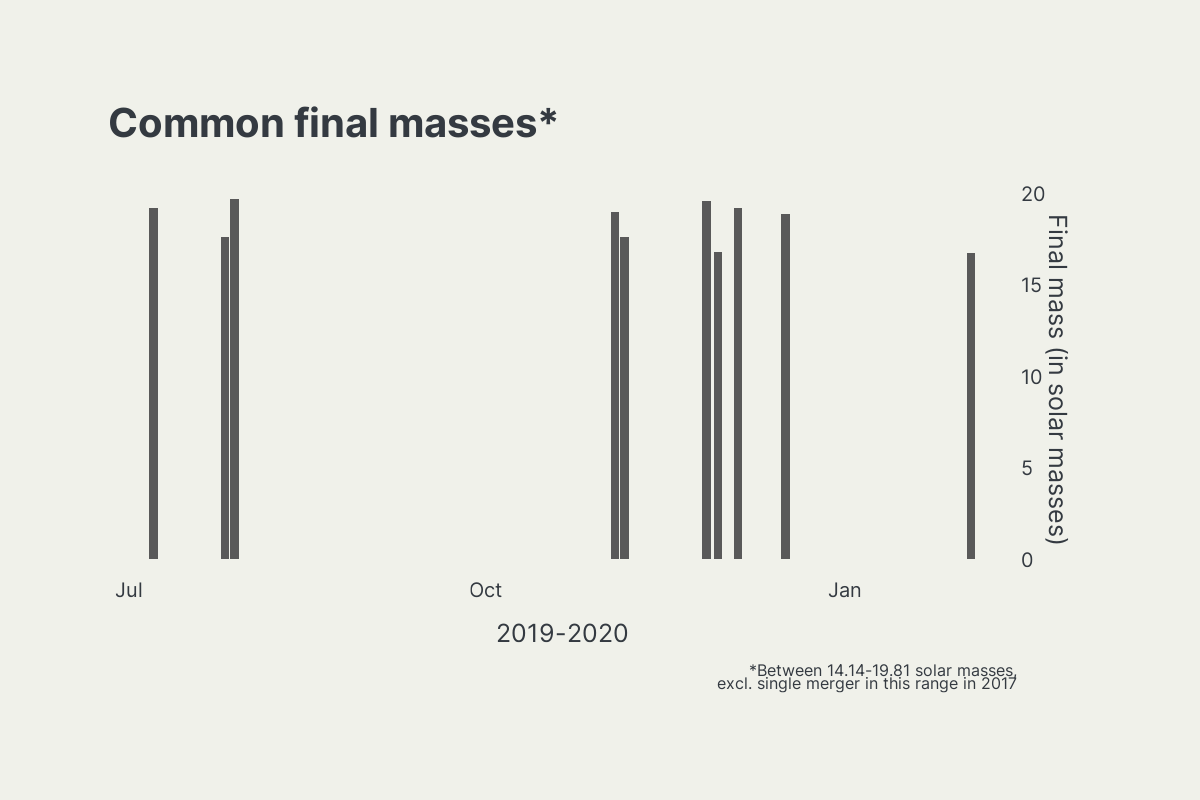

In [72]:
%%R -i common_finals_df -h 800 -w 1200

common_finals_df %>%
filter(merger_datetime > '2019-01-01') %>%
ggplot(aes(merger_datetime, final_mass_source)) +
# geom_histogram(fill = "#343A41", size = 1.4) +
geom_bar(stat = "identity") +
labs(title = "Common final masses*\n",
     y = "\nFinal mass (in solar masses)",
     x = "\n2019-2020",
     caption = "\n*Between 14.14-19.81 solar masses, \nexcl. single merger in this range in 2017") +
scale_y_continuous(position = "right") +
theme_light_beige

Let's look at all the mergers as a timeseries.

In [73]:
gw.head()

,commonName,GPS,mass_1_source,mass_2_source,final_mass_source,merger_datetime
0,GW190424_180648,1.240164e+09,40.5,31.8,68.9,2019-04-24 18:06:48
1,GW190426_152155,1.240327e+09,5.7,1.5,NaN,2019-04-26 15:21:55
2,GW190909_114149,1.252065e+09,45.8,28.3,72.0,2019-09-09 11:41:49
3,GW150914,1.126259e+09,35.6,30.6,63.1,2015-09-14 00:00:00
4,GW151012,1.128679e+09,23.2,13.6,35.6,2015-10-12 00:00:00


In [ ]:
%%R
library(lubridate)

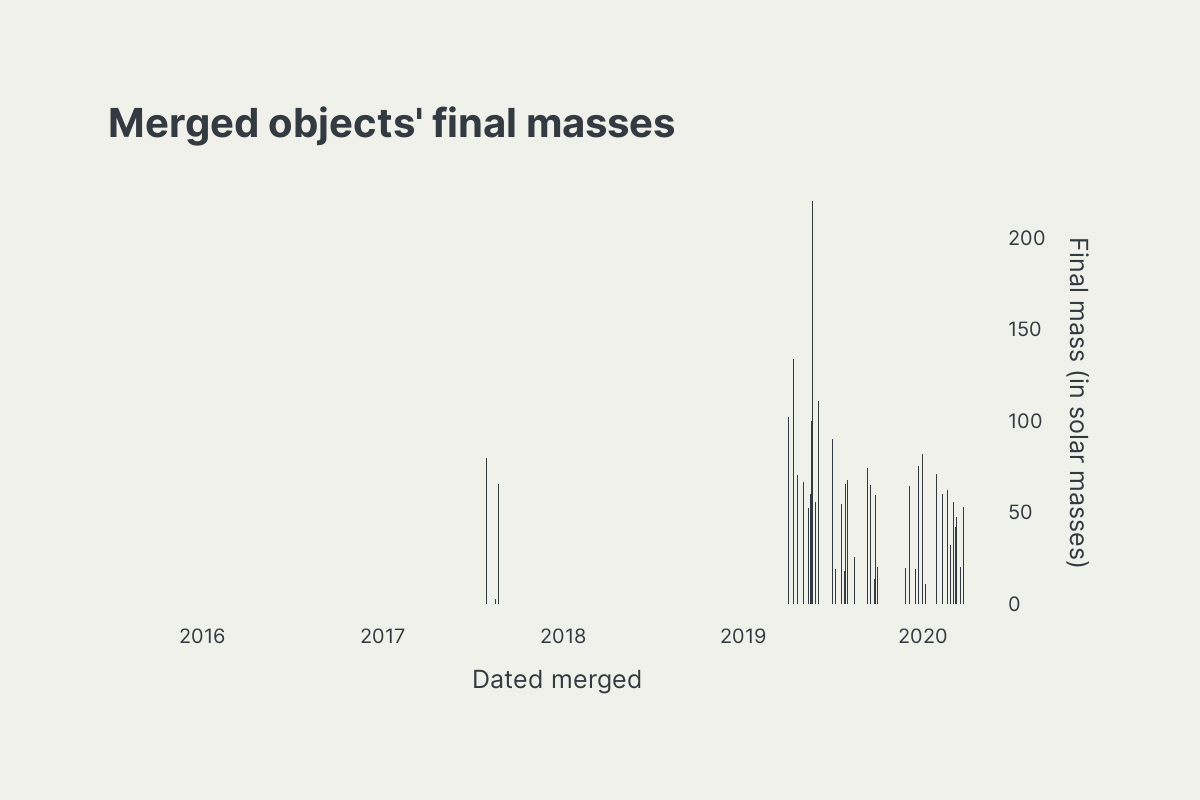

In [113]:
%%R -i gw -h 800 -w 1200

gw %>%
mutate(merger_date = as_date(ymd_hms(merger_datetime))) %>%
ggplot(aes(merger_date, final_mass_source)) +
# geom_histogram(fill = "#343A41", size = 1.4) +
geom_bar(stat = "identity", fill = "#343A41") +
labs(title = "Merged objects' final masses\n",
     y = "Final mass (in solar masses)\n",
     x = "\nDated merged") +
scale_y_continuous(position = "right") +
theme_light_beige

## Pull time series data based on features